## Вольвач Михаил Сергеевич
## ИУ5-62Б

In [2]:
import pandas as pd

# Загрузка данных
data = pd.read_csv("./models/Admission_Predict.csv")

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB
None


## Задание 1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

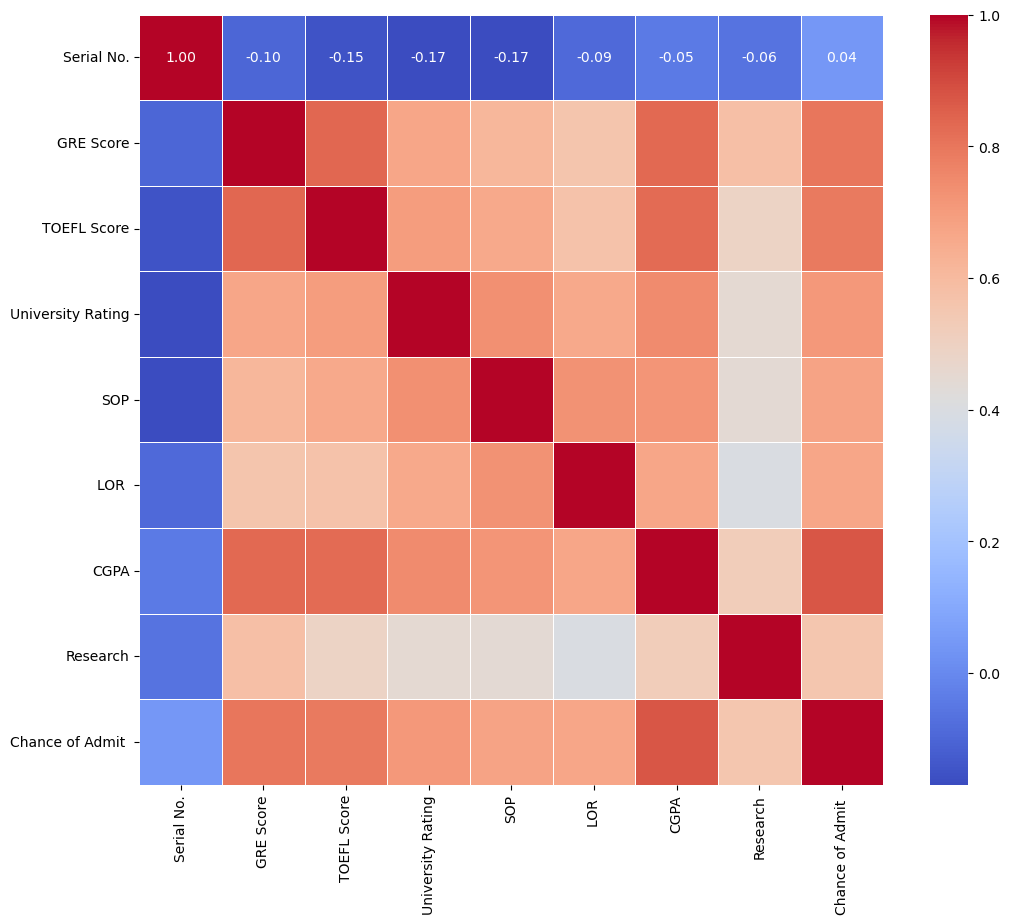

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Проведение корреляционного анализа
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

## Выводы по заданию 1

1. После удаления строк с пропущенными значениями у нас остались полные данные, что хорошо для построения моделей машинного обучения.
2. Признаки, такие как "GRE Scores", "TOEFL Scores", "University Rating", "Statement of Purpose and Letter of Recommendation Strength", "Undergraduate GPA" и "CGPA" имеют относительно высокие коэффициенты корреляции с "Chance of Admit", что указывает на их важность для модели.

## Задание 2
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

В моём датасете нет пропусков данных, поэтому я создам их искуственно

In [22]:
import numpy as np

np.random.seed(42)
random_indices = np.random.choice(data.index, size=10, replace=False)
data.loc[random_indices, 'University Rating'] = np.nan
data.loc[random_indices, 'GRE Score'] = np.nan

In [24]:
# Обработка пропусков для категориального признака "University Rating"
most_common_rating = data['University Rating'].mode()[0]
data['University Rating'].fillna(most_common_rating, inplace=True)

# Обработка пропусков для количественного признака "GRE Scores"
mean_gre_score = data['GRE Score'].mean()
data['GRE Score'].fillna(mean_gre_score, inplace=True)

## Выводы по заданию 2
1. Для категориального признака "University Rating" мы можем заменить пропущенные значения на самое часто встречающееся значение (моду), так как это наиболее логичный способ обработки пропусков для категориальных данных. 
Для количественного признака, например, "GRE Scores", мы можем заменить пропущенные значения на среee.
2. Наиболее логичным выбором признаков для дальнейшего анализа и построения моделей машинного обучения будут те, которые имеют наибольший потенциал для предсказания целевой переменной ("Chance of Admit"). Это могут быть признаки, которые имеют высокие коэффициенты корреляции с "Chance of Admit", такие как "GRE Scores", "TOEFL Scores", "University Rating", "Statement of Purpose and Letter of Recommendation Strength", "Undergraduate GPA" и "CGPA"е.

## Задание 3

Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Масштабирование данных
scaler = StandardScaler()
data['University Rating Scaled'] = scaler.fit_transform(data[['University Rating']])

# Преобразование категориального признака с помощью Label Encoding
label_encoder = LabelEncoder()
data['University Rating Label Encoded'] = label_encoder.fit_transform(data['University Rating'])

# Преобразование категориального признака с помощью One Hot Encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(data[['University Rating']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=[f'University Rating {int(i)}' for i in range(2, 6)])
data = pd.concat([data, one_hot_encoded_df], axis=1)

print(data[['University Rating', 'University Rating Scaled', 'University Rating Label Encoded', 'University Rating 2', 'University Rating 3', 'University Rating 4']].head())


   University Rating  University Rating Scaled  \
0                  4                  0.798829   
1                  4                  0.798829   
2                  3                 -0.076600   
3                  3                 -0.076600   
4                  2                 -0.952029   

   University Rating Label Encoded  University Rating 2  University Rating 3  \
0                                3                  0.0                  0.0   
1                                3                  0.0                  0.0   
2                                2                  0.0                  1.0   
3                                2                  0.0                  1.0   
4                                1                  1.0                  0.0   

   University Rating 4  
0                  1.0  
1                  1.0  
2                  0.0  
3                  0.0  
4                  0.0  


## Выводы по заданию 3

Для решения задачи масштабирования данных я использовал метод стандартизации (`StandardScaler`) из библиотеки scikit-learn. Стандартизация преобразует данные таким образом, что их среднее значение становится равным нулю, а стандартное отклонение равно единице. Этот метод особенно полезен, когда признаки имеют разные диапазоны значений, так как он делает данные более сопоставимыми для модели машинного обучения, что обычно положительно сказывается на качестве модели.

Для преобразования категориальных признаков в количественные использовались методы кодирования: Label Encoding и One Hot Encoding.

1. **Label Encoding** преобразует категориальные значения в числовые, присваивая каждому уникальному значению целочисленный идентификатор. Этот метод подходит, когда категориальный признак имеет упорядоченные значения, как, например, в случае с оценками университетов от 1 до 5. Label Encoding сохраняет пространство признаков, что может быть полезно в некоторых моделях машинного обучения.

2. **One Hot Encoding** преобразует каждое уникальное значение категориального признака в новый бинарный признак, который принимает значение 1, если значение признака соответствует данной категории, и 0 в противном случае. Этот метод особенно полезен, когда значения категориального признака не имеют упорядоченности и не сравнимы между собой. One Hot Encoding создает разреженную матрицу, что может быть эффективно для больших датасетов с большим количеством уникальных категорий.

## Задание 4

Для заданного набора данных постройте основные графики, входящие в этап разведочного анализа данных. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Какие графики Вы построили и почему? Какие выводы о наборе данных Вы можете сделать на основании построенных графиков?

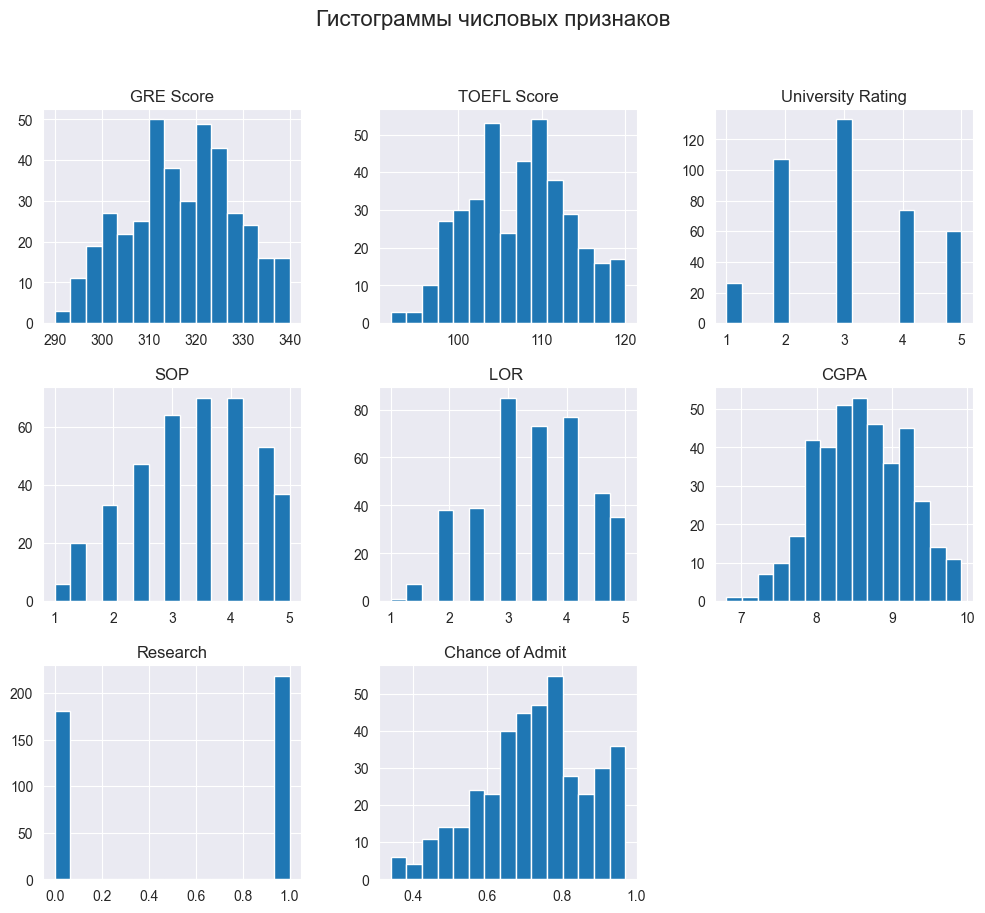

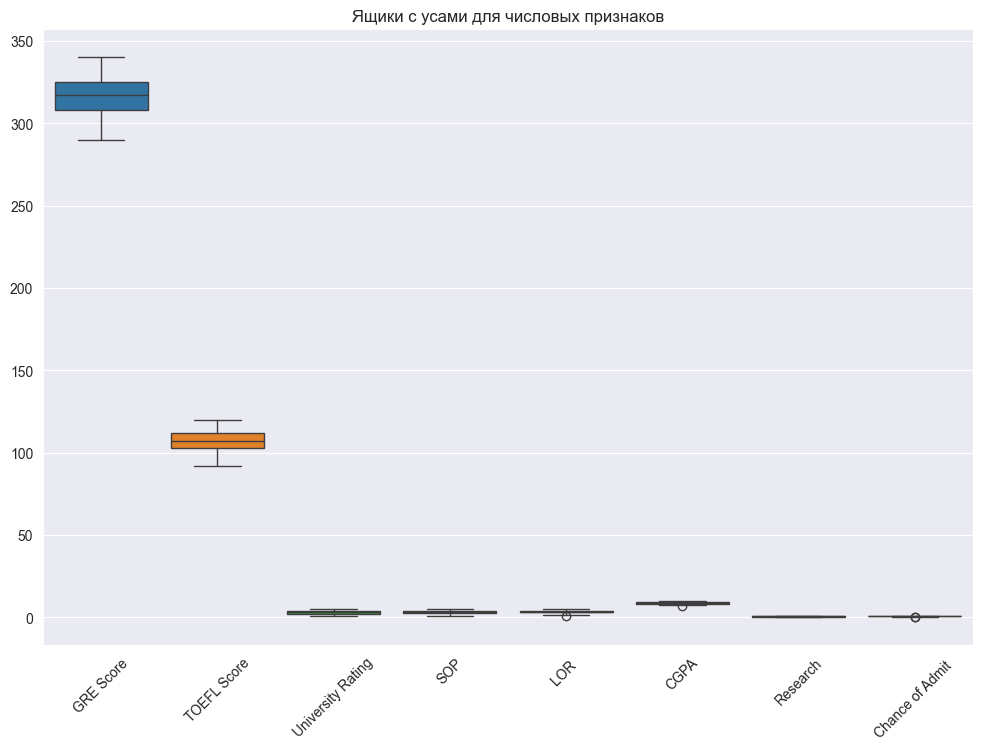

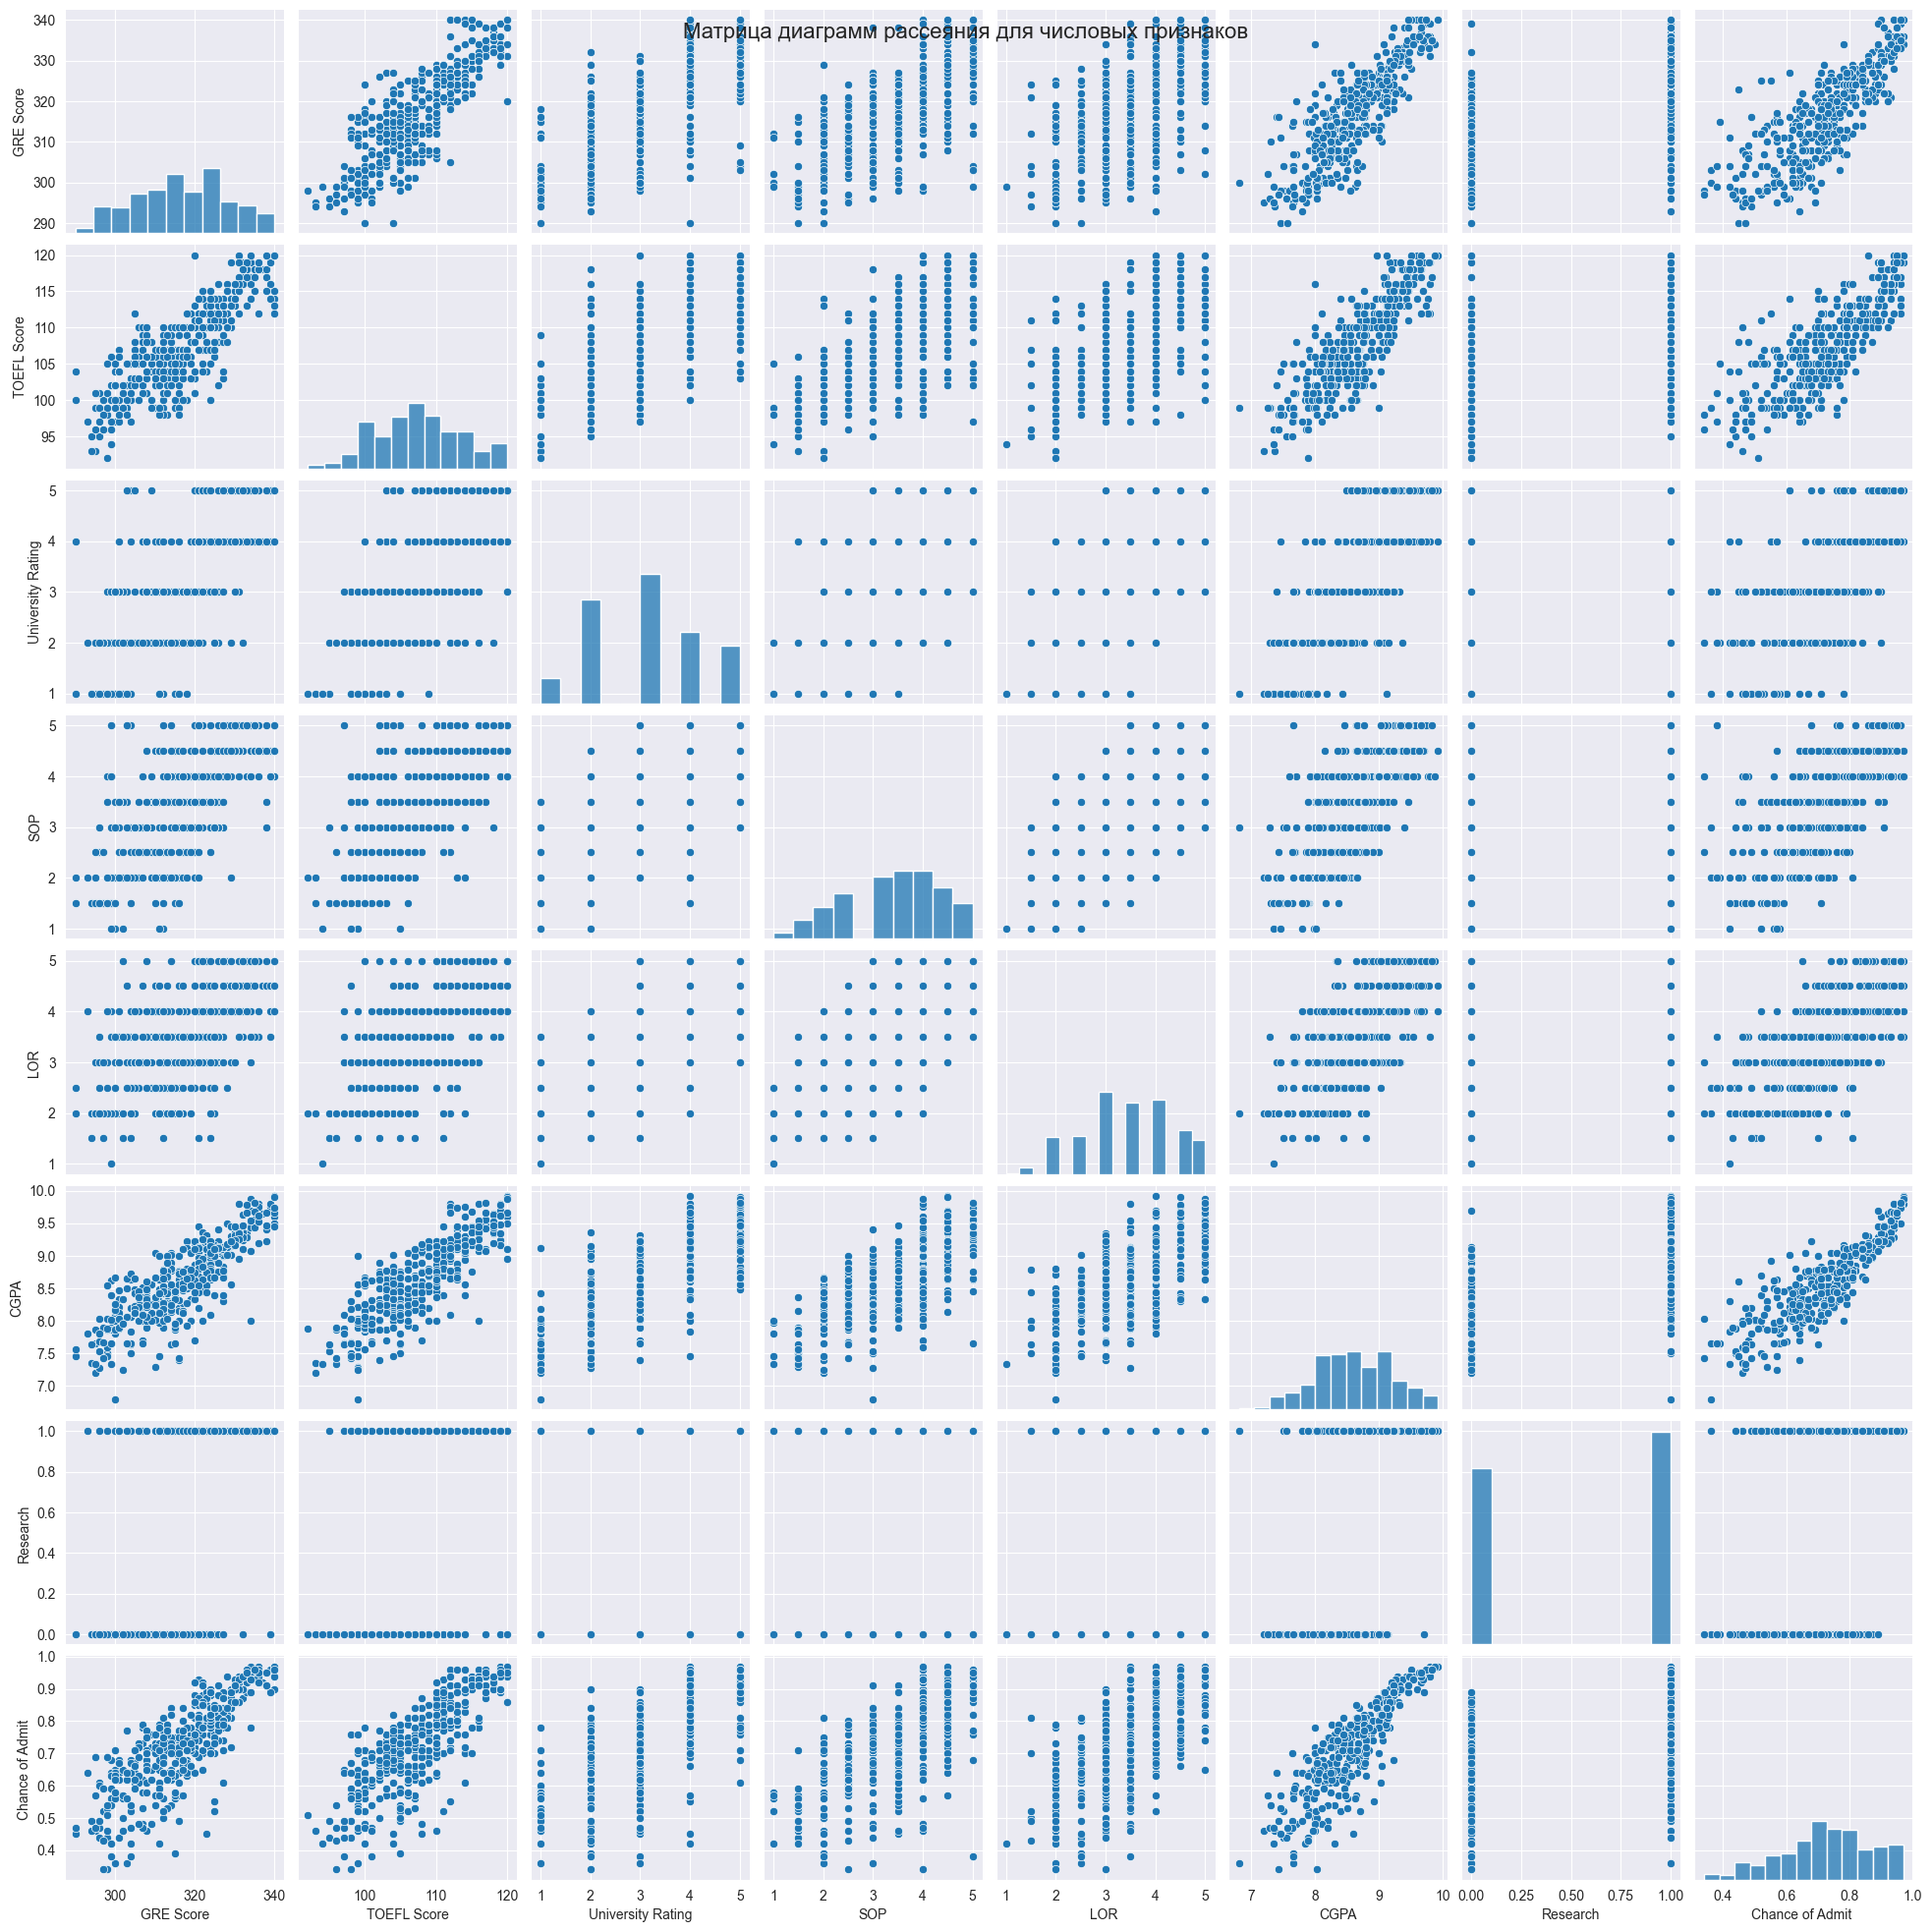

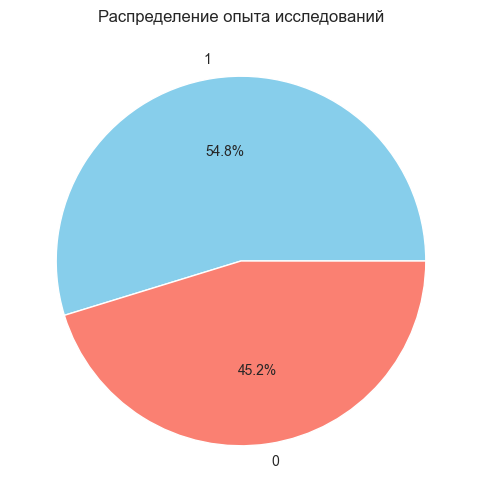

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv("./models/Admission_Predict.csv")

# Удаление строк с пропущенными значениями
data.dropna(inplace=True)

# Построение гистограмм числовых признаков
numerical_features = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
data[numerical_features].hist(bins=15, figsize=(12, 10), layout=(3, 3))
plt.suptitle('Гистограммы числовых признаков', fontsize=16)
plt.show()

# Построение ящиков с усами для числовых признаков
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_features])
plt.title('Ящики с усами для числовых признаков')
plt.xticks(rotation=45)
plt.show()

# Построение матрицы диаграмм рассеяния для пар числовых признаков
sns.pairplot(data[numerical_features])
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков', fontsize=16)
plt.show()

# Построение круговой диаграммы для категориального признака "Research"
plt.figure(figsize=(6, 6))
data['Research'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Распределение опыта исследований')
plt.ylabel('')
plt.show()
